# Praca domowa nr 2 (SHAP)
Autor: Paulina Tomaszewska

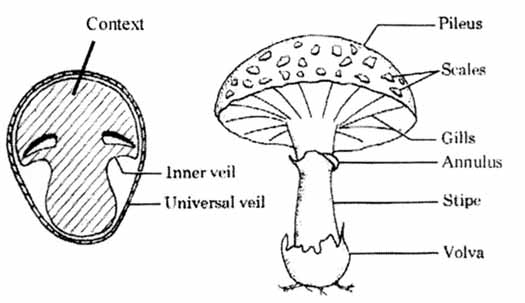

https://datascienceplus.com/mushrooms-classification-part-1/

## Pakiety

In [143]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder

## Wczytanie danych

In [144]:
data=pd.read_csv("mushrooms.csv")
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

## Wyjaśnienie oznaczeń
1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. bruises: bruises=t, no=f
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
6. gill-attachment: attached=a, descending=d, free=f, notched=n
7. gill-spacing: close=c, crowded=w, distant=d
8. gill-size: broad=b, narrow=n
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. stalk-shape: enlarging=e, tapering=t
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. veil-type: partial=p, universal=u
17. veil-color: brown=n, orange=o, white=w, yellow=y
18. ring-number: none=n, one=o, two=t
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## Inżynieria cech

W poprzedniej pracy domowej wykazano, że dla zbioru danych mushroom zastosowanie target encoding skutkuje niskim wynikiem accuracy. Wynik bliski 100% uzyskano stosując one-hot encoding, która jednak znacząco zwiększa wymiarowość danych. W metodzie SHAP wyliczana jest kontrybucja wszystkich zmiennych, przez co analiza w przypadku dużego większenia liczby kolumn poprzez metodę one-hot jest problematyczna. W ramach dyskusji podczas laboratoriów dowiedziałam się, że zastosowanie metody label encoder (tj. przypisanie kategoriom wartości całkowitych), mimo iż niepoprawne pod względem metodologicznym, prowadzi do wysokiej jakości predycji. Z uwagi na to, że metoda one-hot encoding i label encoding prowadzą do podobnych wartości accuracy, jednak druga z nich nie powoduje zwiększonej liczby zmiennych objaśniających, zdecydowano się na drugą metodę. 

In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(data['class'])
data.drop('class', axis=1, inplace=True)
le.classes_

array(['e', 'p'], dtype=object)

In [146]:
dict_encoding={}
for col in data.columns:
    data[col]=le.fit_transform(data[col])
    dict_encoding[col]=le.classes_

In [147]:
data.head(5)

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   
2                         2                       7                       7   
3                         2                       7                       7   
4                         2                       7                       7   

   veil-type  veil-color  ring-number  ring-type  spore-print-color  \
0          0           2            1          4                  2   
1          0           2            1          4                  3   
2          0           2            1          4                  3   
3          0           2            1          4                  2   
4          0           2            1          0                  3   

   population  habitat  
0           3        5  
1           2        1  
2           2        3  
3           3        5  
4           0        1  

[5 rows x 22 columns]

In [148]:
from sklearn.model_selection import train_test_split
seed = 70
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=test_size, random_state=seed)

# Klasyfikatory oparte na drzewach

- RandomForest
- xgboost
- Lightgbm

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

def classifier(model):
    model=model.fit(x_train, y_train)
    accuracy=accuracy_score(model.predict(x_test),y_test)
    return accuracy*100, model

In [150]:
acc, model_rf =classifier(RandomForestClassifier(max_depth=6, random_state=8))
print("Accuracy RandomForest: %.2f%%" % (acc))

Accuracy RandomForest: 99.51%


In [151]:
acc, model_xgb=classifier(XGBClassifier(objective ='binary:logistic'))
print("Accuracy XGBoost: %.2f%%" % (acc))

Accuracy XGBoost: 100.00%


In [152]:
import lightgbm as lgb
# create dataset for lightgbm
d_train = lgb.Dataset(x_train, label=y_train)
d_test = lgb.Dataset(x_test, label=y_test)
#Train the model
params = {
    "max_bin": 512,
    "learning_rate": 0.005,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model_lightgbm = lgb.train(params,d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[228]	valid_0's auc: 0.999398


## SHAP

In [232]:
import shap
import xgboost

def shap_decomposition(model, tree_based, index):
# load JS visualization code to notebook
  shap.initjs()
  if tree_based==True:
    explainer = shap.TreeExplainer(model, model_output='probability', data=shap.sample(x_test,100))
  else:
    f = lambda x: model.predict_proba(x)[:,1]
    explainer=shap.KernelExplainer(model.predict_proba, shap.sample(x_test, 100))
  shap_values = explainer.shap_values(x_test.iloc[index,:])
  return explainer, shap_values

def shap_extreme(shap_values, index_needed=True, list_index=None):
  if index_needed:
    data=shap_values[list_index]
  else:
    data=shap_values
  display(pd.DataFrame(data=data, index=x_test.columns).sort_values(by=0, ascending=False).head(5).rename(columns={0: "top shap values"}))
  display(pd.DataFrame(data=data, index=x_test.columns).sort_values(by=0, ascending=False).tail(5).rename(columns={0: "smallest shap values"}))


### W ramach pierwszego eksperymentu postanowiono sprawdzić jak będą się różniły wartości Shapleya dla tej samej próbki (index =2), gdy zastosuje się różne klasyfikatory jednak o zbliżonych accuracy

In [154]:
example_index=2
example_sample= x_test.iloc[example_index,:]

# Random Forest

In [156]:
model_rf.predict_proba(x_test.values[example_index,:].reshape(1,-1))

array([[0.00269624, 0.99730376]])

In [157]:
explainer

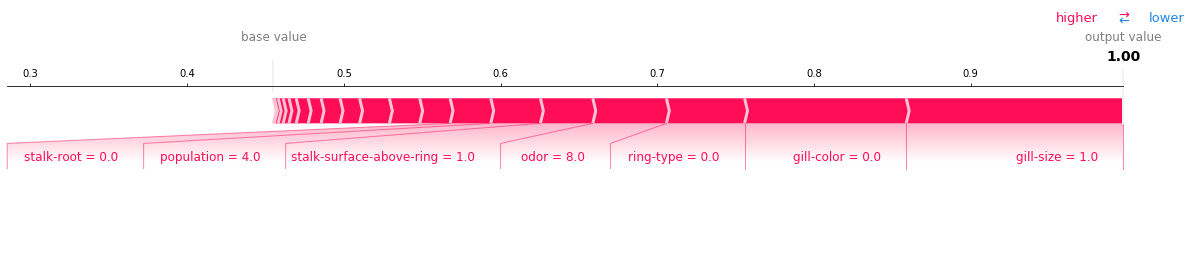

None

top shap values
gill-size                        0.138456
gill-color                       0.103159
ring-type                        0.049886
odor                             0.046962
stalk-surface-above-ring         0.033421

smallest shap values
stalk-shape                  0.002423
cap-shape                    0.000632
veil-type                    0.000000
veil-color                   0.000000
gill-attachment              0.000000

In [158]:
explainer, shap_values=shap_decomposition(model_rf, True, example_index)
# visualize the one prediction's explanation (use matplotlib=True to avoid Javascript)
display(shap.force_plot(explainer.expected_value[1], shap_values[1],example_sample, matplotlib=True))

shap_extreme(shap_values)

In [159]:
print(dict_encoding['gill-size'])
print(dict_encoding['gill-color'])
print(dict_encoding['ring-type'])
dict_encoding['odor']

['b' 'n']
['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
['e' 'f' 'l' 'n' 'p']


array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object)

###  Wniosek: Wszystkie zmienne zwiększają prawdopodobieństwo, że właściwą klasą jest 1 (czyli grzyb jest trujący) - największym wpływ na to miało:
- gill-size=1 (co oznacza, że blaszki są wąskie (narrow), 
- gill-color=0 (co oznacza, że blaszki mają kolor pławożółty (buff)), 
- ring-type=0 (czyli pierścień jest przemijający),
- odor=8 (fishy, czyli rybny). 

### Predycja jest zgodna z oczekiwaniem - rybny zapach nie zachęca do zjedzenia grzyba, skłaniając do stwierdzenia, że jest on trujący.

# XGBoost

In [160]:
model_xgb.predict_proba(x_test)[example_index]

array([9.9062920e-05, 9.9990094e-01], dtype=float32)

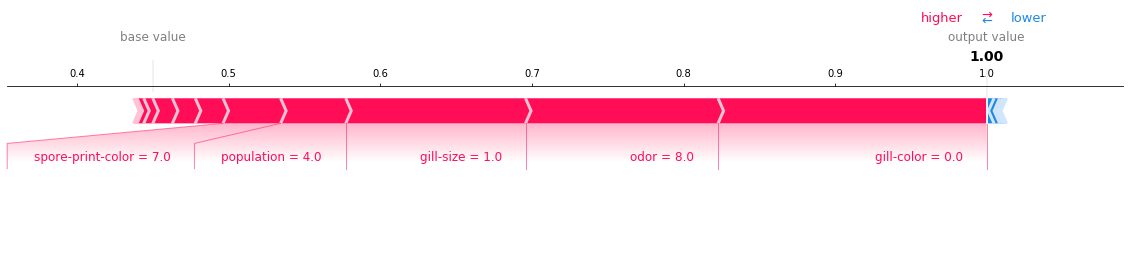

None

top shap values
gill-color                0.177153
odor                      0.126979
gill-size                 0.118553
population                0.042952
spore-print-color         0.037983

smallest shap values
ring-number             -0.001067
cap-color               -0.001481
cap-shape               -0.001842
stalk-shape             -0.003695
bruises                 -0.004850

In [161]:
explainer, shap_values=shap_decomposition(model_xgb, True, example_index)
shap.initjs()
#plotuje p-stwo klasy 1
display(shap.force_plot(explainer.expected_value, shap_values, x_test.iloc[example_index,:], matplotlib=True))

shap_extreme(shap_values, False)

In [162]:
print(dict_encoding['bruises'][example_sample['bruises']])
print(dict_encoding['stalk-shape'][example_sample['stalk-shape']])
dict_encoding['cap-shape'][example_sample['cap-shape']]

f
t


'k'

### Wniosek: Największy wpływ na zwiększenie p-stwa, że grzyb jest trujący miały:
- gill-color=0 (co oznacza, że blaszki mają kolor pławożółty (buff)),
- odor = 8 (fishy, czyli rybny),
- gill_size =1 (co oznacza, że blaszki są wąskie (narrow)). 

### Natomiast na zmniejszenie p-stwa miały wpływ (podano wartości zmiennych przed kodowaniem):
- bruises = f (brak zasinień), 
- stalk-shape=t (zwężana nóżka),
- cap-shape=k (wypukły kapelusz) .

### Zgodnie z przewidywaniem rybny zapach świadczy o tym, że grzyb jest trujący (taki sam wniosek uzyskano gdy użyto RandomForest), natomiast brak zasinień skłania do myślenia, że grzyb jest jadalny (intuicyjne).

ewentualne problemy z zastosowaniem xgboost: https://evgenypogorelov.com/multiclass-xgb-shap.html

# LightGBM

In [163]:
#p-stwo klasy 1
model_lightgbm.predict(x_test)[example_index]

0.8292221783000392

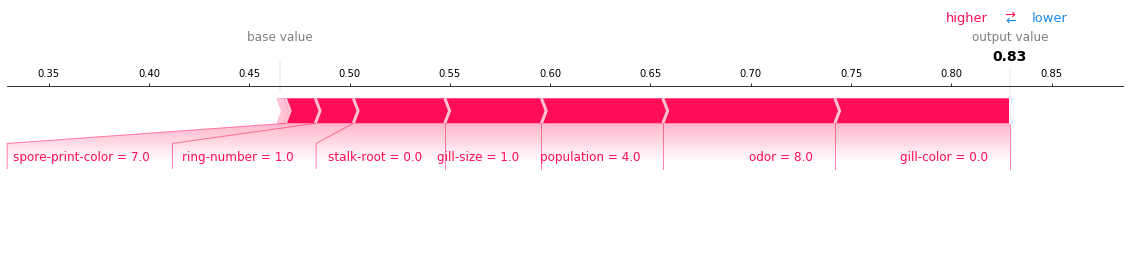

None

top shap values
gill-color         0.087301
odor               0.085757
population         0.060543
gill-size          0.048175
stalk-root         0.045627

smallest shap values
cap-color                             0.000000
stalk-shape                           0.000000
habitat                              -0.000174
cap-shape                            -0.000180
stalk-surface-below-ring             -0.000613

In [168]:
explainer, shap_values=shap_decomposition(model_lightgbm, True,example_index)
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values, x_test.iloc[example_index,:], matplotlib=True))

shap_extreme(shap_values,False)

In [165]:
dict_encoding['population'][4]

'v'

In [166]:
print(dict_encoding['habitat'][example_sample['habitat']])
print(dict_encoding['cap-shape'][example_sample['cap-shape']])
dict_encoding['stalk-surface-below-ring'][example_sample['stalk-surface-below-ring']]

l
k


'k'

### Wniosek: Do zwiększenia p-stwa, że grzyb jest niejadalny, przyczyniły się głównie wartości:
- gill-color=0 (blaszki pławożółte),
- odor=8 (rybny zapach),
- population=4 (pojedyncze występowanie).
### Natomiast obniżeniem p-stwa skutkowały (podano wartości przed zakodowaniem):
- habitat=l (występuje wśród liści),
- cap-shape=k (wypukły kapelusz), 
- stalk-surface-below-ring=k (jedwabna powierzchnia pod pierścieniem).

### Zgodnie z oczekiwaniem zapach rybny świadczy o tym, że grzyb jest niejadalny (taki sam wniosek był gdy zastosowano RandomForest i xgboost).
## Wniosek: Wszystkie trzy klasyfikatory (o zbliżonym accuracy) skutowały uzyskaniem bardzo podobnych wyjaśnień dla tej samej obserwacji

# Postanowiono eksplorować inne funkcje udostępnione przez pakiet SHAP.

In [28]:
shap.initjs()
explainer = shap.TreeExplainer(model_lightgbm, model_output='probability', data=shap.sample(x_test,100), matplotlib=True)
shap_values=explainer.shap_values(x_test)
shap.force_plot(explainer.expected_value,shap_values[:1000,:], x_test.iloc[:1000,:])

### Analiza powyższego wykresu (gdy na osi poziomej wybrana jest opcja "original sample ordering") pozwoli na szybkie znalezienie różniących się przypadków. Zaobserwowano, że dla próbki o indeksie=119 znaczące różnią się zmienne o najwyższych wartościach Shapleya w stosunku do obserwacji o indeksie=2.

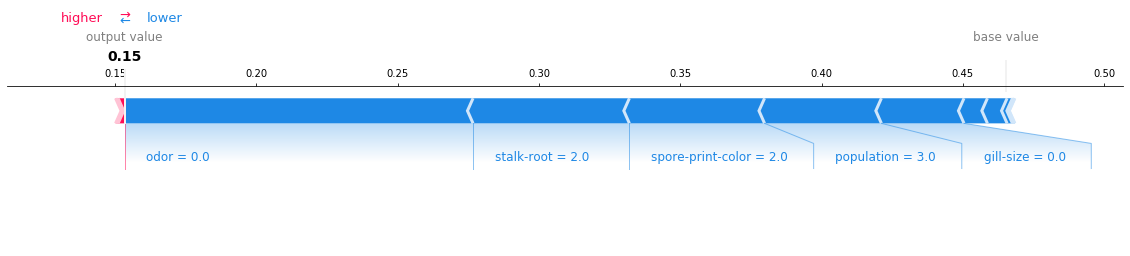

None

top shap values
ring-number                    0.002300
habitat                        0.000588
gill-spacing                   0.000319
stalk-color-above-ring         0.000000
cap-color                      0.000000

smallest shap values
gill-size                     -0.029231
population                    -0.041347
spore-print-color             -0.047831
stalk-root                    -0.055323
odor                          -0.123291

In [23]:
explainer, shap_values=shap_decomposition(model_lightgbm, True,119)
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values, x_train.iloc[119,:], matplotlib=True))

shap_extreme(shap_values,False)

In [132]:
dict_encoding['spore-print-color']

array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=object)

### W przypadku tej obserwacji największy wpływ na końcową predykcję (obniżenie p-stwa, że grzyb jest niejadalny) miały zmienne: 
- odor = 0 (zapach migdałowy), 
- stalk-root=2 (ang. club),
- spore-print-color=2 (o kolorze czarnym). 

### Wynik jest zgodny z oczekiwaniami - zapach migdałowy świadczy o tym, ze grzyb jest jadalny.
### Natomiast dla poprzedniej obserwacji najważniejsze były wartości odor=8 (zapach rybny) , gill-color=0 (kolor pławożółty) i population=4 (pojedyncze wystąpienia). Nie było w analizowanym zbiorze obserwacji dla której jedną z najważniejszych zmiennych nie byłoby odor, gill-size bądź gill-color.


### Jednocześnie należy zauważyć, że dla poprzedniej obserwacji zmienna odor=8 powodowała wzrost p-stwa, że grzyb jest niejadalny, podczas gdy dla obecnie analizowanej obserwacji spowodowała jego obniżenie (odor=0).


## Postanowiono znaleźć obserwację, dla której stalk-root=2 będzie powodować zwiększenie p-stwa, że grzyb jest niejadalny, a nie jak w przypadku poprzedniej obserwacji zmniejszenie.

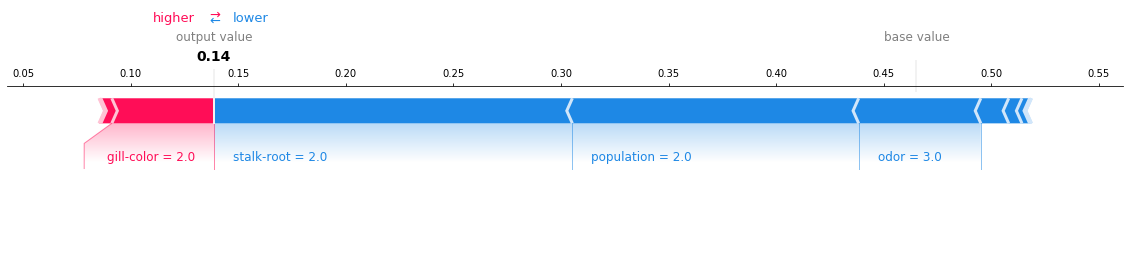

None

top shap values
gill-color           0.047508
ring-number          0.005082
cap-shape            0.000410
habitat              0.000293
gill-spacing         0.000156

smallest shap values
gill-size                     -0.006163
spore-print-color             -0.012957
odor                          -0.056777
population                    -0.133058
stalk-root                    -0.166536

In [236]:
# obserwacja o indeksie 1551
explainer, shap_values=shap_decomposition(model_lightgbm, True,x_test.index==1551)
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values, x_test.loc[x_test.index==1551], matplotlib=True))

shap_extreme(shap_values, True, 0)

## Dalsza eksploracja możliwości pakietu shap

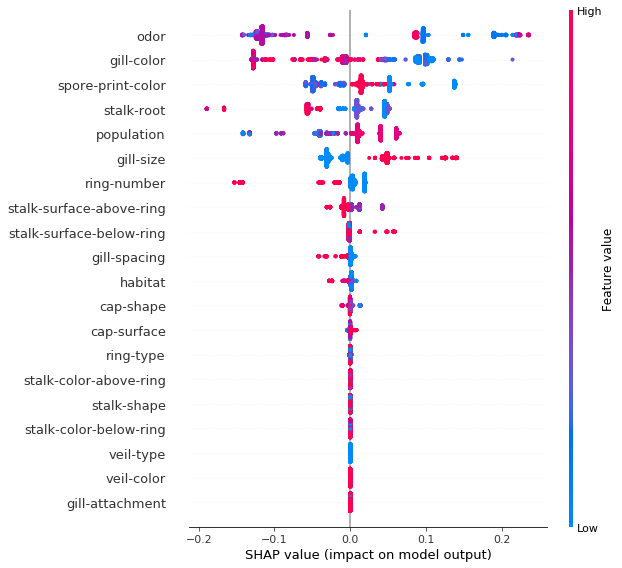

In [134]:
shap.initjs()
explainer = shap.TreeExplainer(model_lightgbm, model_output='probability', data=shap.sample(x_test,100), matplotlib=True)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

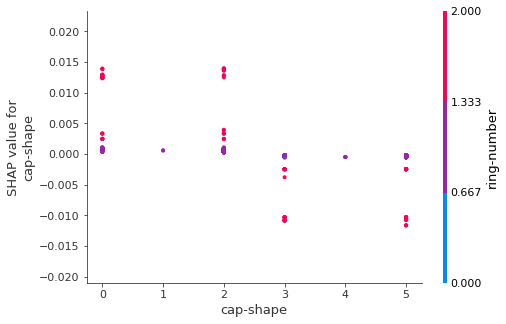

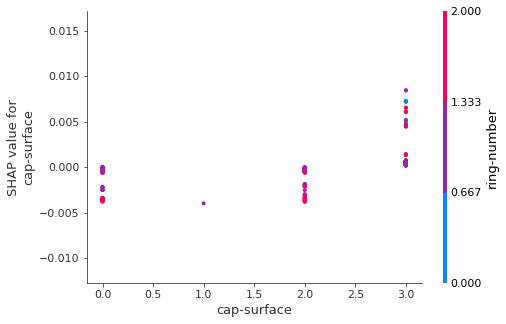

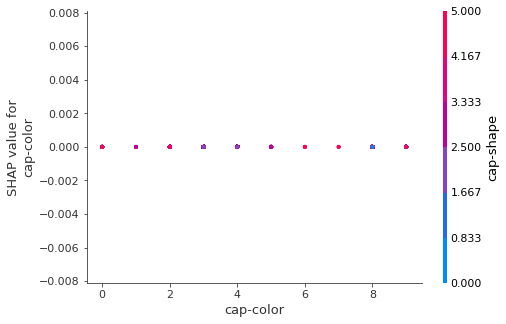

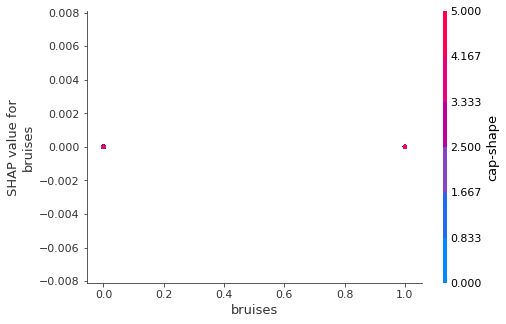

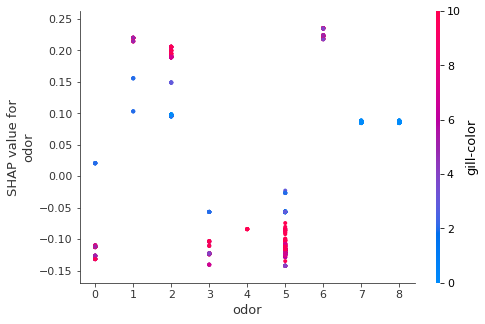

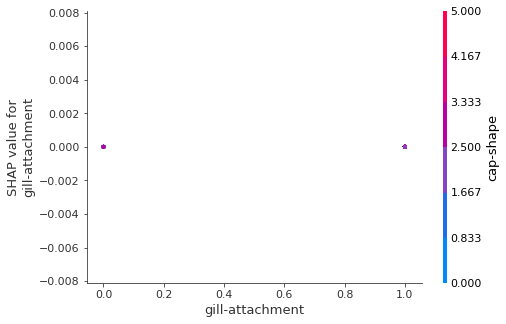

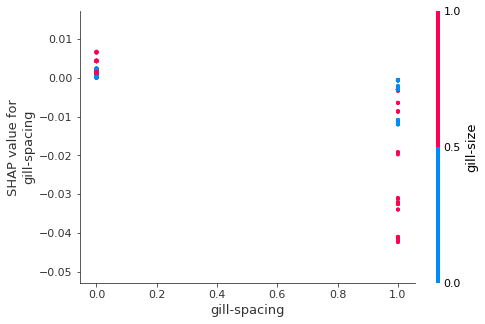

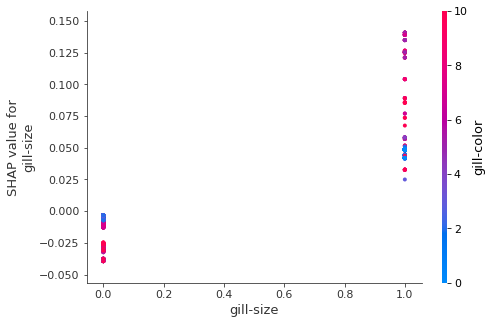

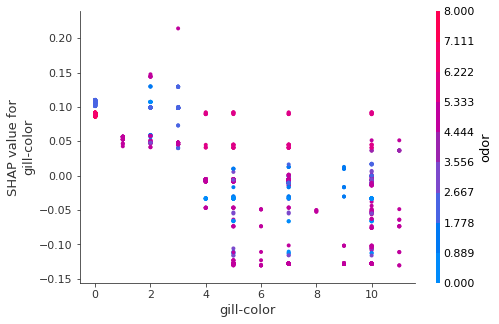

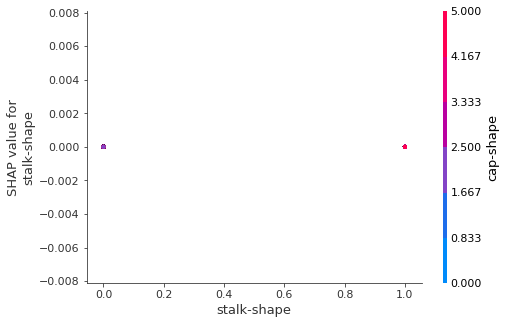

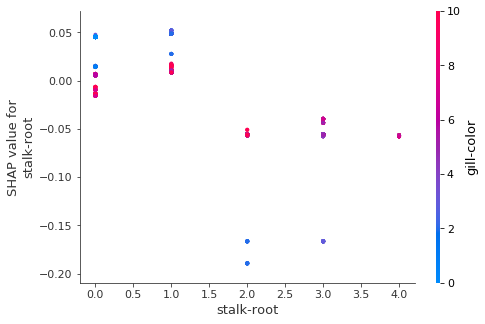

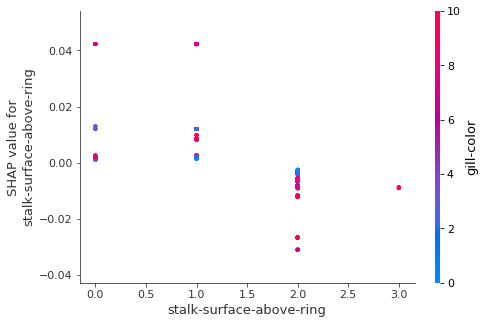

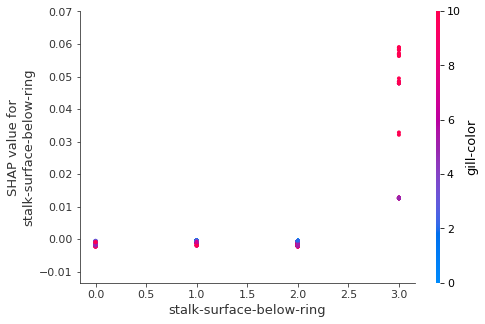

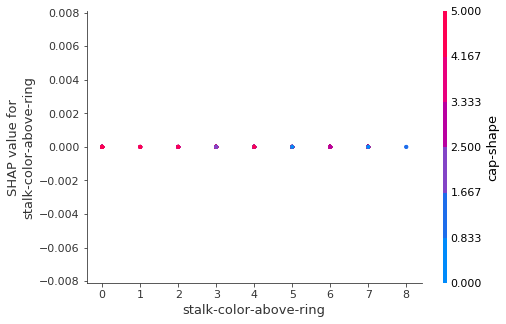

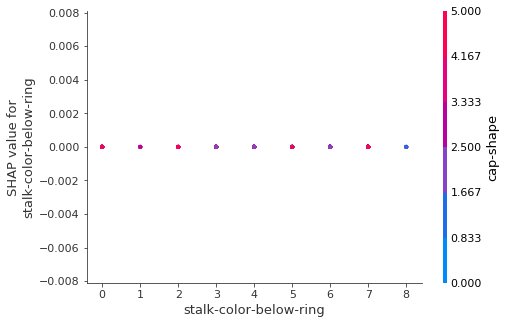

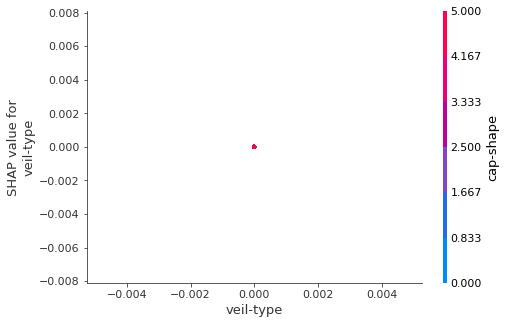

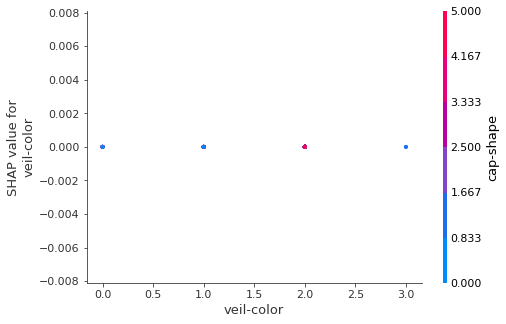

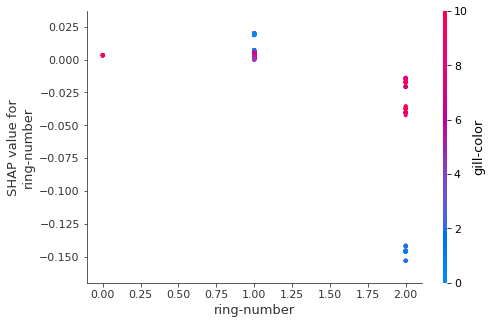

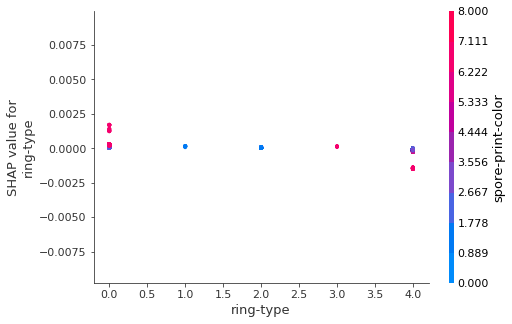

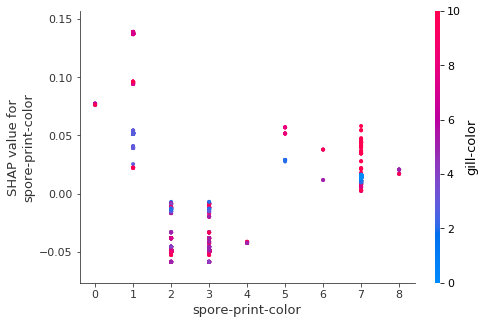

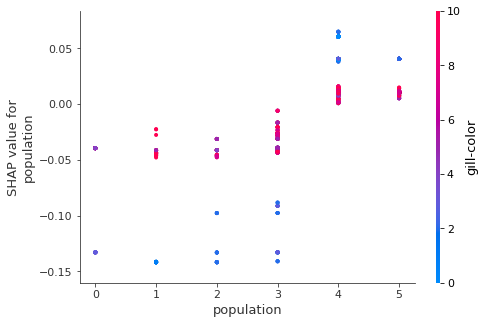

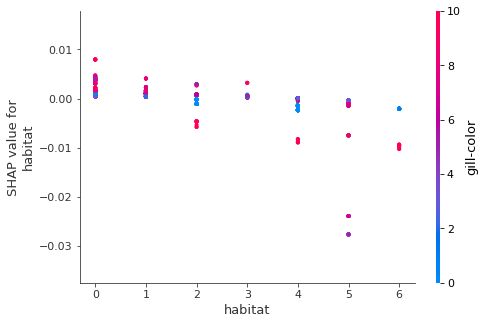

In [135]:
shap.initjs()
for name in x_test.columns:
    shap.dependence_plot(name, shap_values, x_test, display_features=x_test)

# Klasyfikator nieoparty na drzewach 

### próbka o indeksie=2

98.8923076923077


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


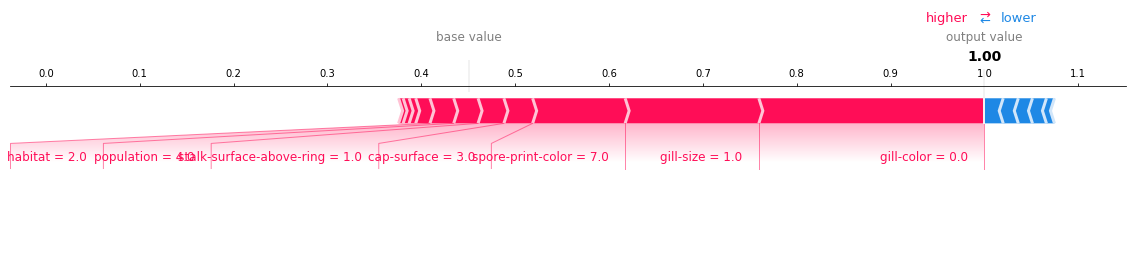

None

top shap values
gill-color                       0.240313
gill-size                        0.142462
spore-print-color                0.098580
cap-surface                      0.030625
stalk-surface-above-ring         0.027529

smallest shap values
stalk-shape             -0.008536
ring-type               -0.014903
bruises                 -0.015091
odor                    -0.016070
stalk-root              -0.020101

In [137]:
from sklearn.linear_model import LogisticRegression
acc, model_logistic=classifier(SVC(probability=True)) 
print(acc)

explainer, shap_values=shap_decomposition(model_logistic, False, example_index)
shap.initjs()

display(shap.force_plot(explainer.expected_value[1], shap_values[1], example_sample, matplotlib=True))

shap_extreme(shap_values, True)

### próbka o indeksie=119

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


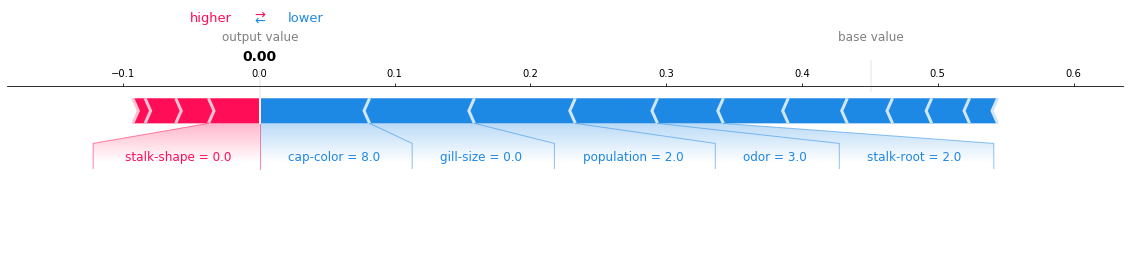

None

top shap values
stalk-shape          0.037820
ring-type            0.024152
habitat              0.022545
gill-spacing         0.009023
ring-number          0.000000

smallest shap values
stalk-root             -0.048492
odor                   -0.060522
population             -0.074355
gill-size              -0.077182
cap-color              -0.080879

In [138]:
explainer, shap_values=shap_decomposition(model_logistic, False, 119)
shap.initjs()

display(shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[119,:], matplotlib=True))

shap_extreme(shap_values, True)

In [141]:
dict_encoding['population'][2]

'n'

### Gdy przeanalizowano wartości Shapleya dla obserwacji nr 119 gdy zastosowano model light_gbm to jako najważniejsze uznano zmienne:
- odor = 0 (zapach migdałowy), 
- stalk-root=2 (ang. club),
- spore-print-color=2 (o kolorze czarnym). 

### Gdy zastosowano model SVM dla tej samej obserwacji, okazało się, że największą kontrybucję miały:
- cap-color=8 (biały kolor kapelusza),
- gill-size=0 (szerokie blaszki),
- population=2 (liczne skupiska).
Na czwartym miejscu znalazła się zmienna odor, która tym razem miała kontrybucję o wartości -0.062 (a więc dwa razy mniejszą niż w przypadku klasyfikatora lightgbm)

# Podsumowanie

Narzędzie SHAP pozwala na tworzenie ciekawych analiz. Analiza dekompozycji dla tej samej zmiennej jednak gdy użyto inne klasyfikatory (choć o bardzo podobnym accuracy) ujawniła odmienne kontrybucje zmiennych, jednak zawsze wśród trzech najważniejszych zmiennych znajdowała się gill-size lub odor. Jednak pozostałe dwie najważniejsze zmienne się różniły i udało się zademostrować taki przykład. Zaobserwowano, że ta sama zmienna w zależności od analizowanej obserwacji może zwiększać bądź zmniejszać predykcję.
### Przykładowe wnioski:
- wartość zmiennej population oznaczająca pojedyncze wystąpienia świadczy o tym, że grzyb jest niejadalny, podczas gdy liczne wystąpienia świadczą o tym, że grzyb jest jadalny
- zapach rybny świadczy o tym, ze grzyb jest niejadalny, podczas gdy zapach migdałowy o tym, że grzyb jest jadalny (dotyczy to wszystkich obserwacji)
- zidentyfikowano dwie obserwacje, dla których wartość stalk-root=2 raz powoduje, że grzyb postrzegany jest jako jadalny a raz jako niejadalny
- zidentyfikowano dwie obserwacje, dla których inne zmienne miały największe wartości Shapleya (dla jednej było to odor = 0 (zapach migdałowy), stalk-root=2 (ang. club), spore-print-color=2 (o kolorze czarnym), a dla drugiej odor=8 (zapach rybny), gill-color=0 (kolor pławożółty) i population=4 (pojedyncze wystąpienia).